In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dft = pd.read_csv("train.csv")

In [ ]:
dft.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [ ]:
dft.shape


(400, 15)

In [ ]:
dft.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
dft.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
dft.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
q1 = dft.MEDV.quantile(0.25)
q3 = dft.MEDV.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max", dft.MEDV.max())
print ("min", dft.MEDV.min())
dft.MEDV= dft.MEDV.clip(lower_threshold,upper_threshold)

upper 36.849999999999994
lower 5.2500000000000036
max 50.0
min 5.0


**#CRIM - per capita crime rate by town**

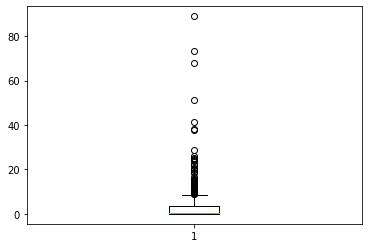

In [ ]:
#CRIM - per capita crime rate by town
plt.boxplot(dft.CRIM)
plt.show()

In [ ]:
#crim - 
q1 = dft.CRIM.quantile(0.25)
q3 = dft.CRIM.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
dft.CRIM.max()
dft.CRIM.min()

0.0090599999999999

In [ ]:
print("upper",upper_threshold)
print("lower",lower_threshold)

upper 8.74183875
lower -5.1205912499999995


In [ ]:
dft.CRIM= dft.CRIM.clip(lower_threshold,upper_threshold)

,CRIM,MEDV
CRIM,1.000000,-0.556479
MEDV,-0.556479,1.000000


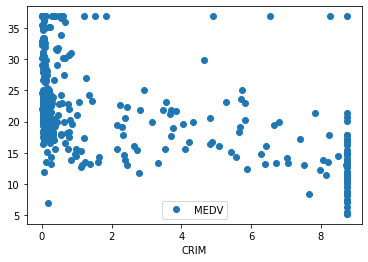

In [ ]:
dft.plot(x='CRIM', y='MEDV', style='o')
dft[['CRIM','MEDV']].corr()

**ZN - proportion of residential land zoned for lots over 25,000 sq.ft**

In [ ]:

q1 = dft.ZN.quantile(0.25)
q3 = dft.ZN.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)


upper 31.25
lower -18.75


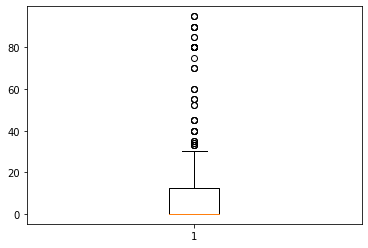

In [ ]:
plt.boxplot(dft.ZN)
plt.show()

In [ ]:
dft.ZN= dft.ZN.clip(lower_threshold,upper_threshold)

,ZN,MEDV
ZN,1.00000,0.41341
MEDV,0.41341,1.00000


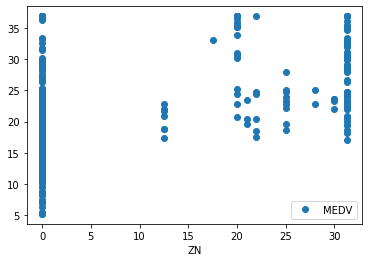

In [ ]:
dft.plot(x='ZN', y='MEDV', style='o')
dft[['ZN','MEDV']].corr()

**INDUS - proportion of non-retail business acres per town.**

In [ ]:
#INDUS
q1 = dft.INDUS.quantile(0.25)
q3 = dft.INDUS.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max", dft.INDUS.max())
print ("min", dft.INDUS.min())


upper 37.55500000000001
lower -14.325000000000006
max 27.74
min 0.46


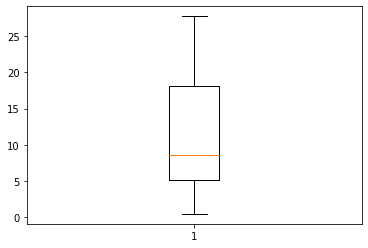

In [ ]:
plt.boxplot(dft.INDUS)
plt.show()

,INDUS,MEDV
INDUS,1.000000,-0.578952
MEDV,-0.578952,1.000000


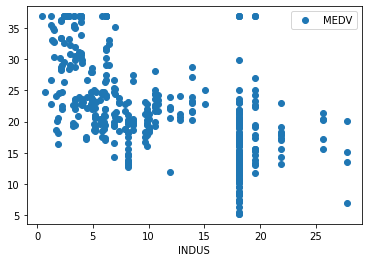

In [ ]:
dft.plot(x='INDUS', y='MEDV', style='o')
dft[['INDUS','MEDV']].corr()

**CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) **bold text**
**

In [ ]:
dft.CHAS.unique()

array([0, 1])

,CHAS,MEDV
CHAS,1.000000,0.151579
MEDV,0.151579,1.000000


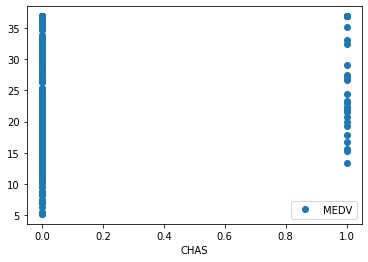

In [ ]:
dft.plot(x='CHAS', y='MEDV', style='o')
dft[['CHAS','MEDV']].corr()


**NOX - nitric oxides concentration (parts per 10 million)**

In [ ]:
#nox
q1 = dft.NOX.quantile(0.25)
q3 = dft.NOX.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.NOX.max())
print ("min",dft.NOX.min())


upper 0.8865
lower 0.18650000000000005
max 0.871
min 0.385


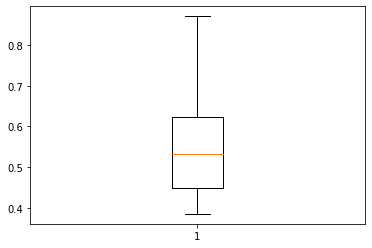

In [ ]:
plt.boxplot(dft.NOX)
plt.show()

,NOX,MEDV
NOX,1.000000,-0.517141
MEDV,-0.517141,1.000000


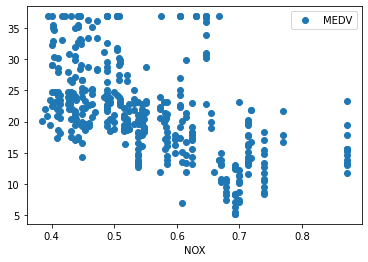

In [ ]:
dft.plot(x='NOX', y='MEDV', style='o')
dft[['NOX','MEDV']].corr()


**RM - average number of rooms per dwelling**

In [ ]:
#RM
q1 = dft.RM.quantile(0.25)
q3 = dft.RM.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.RM.max())
print ("min",dft.RM.min())



upper 7.734999999999999
lower 4.763000000000002
max 8.78
min 4.138


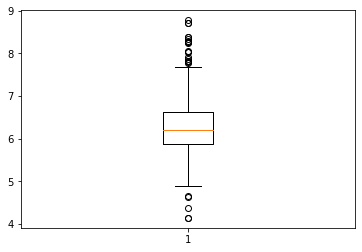

In [ ]:
plt.boxplot(dft.RM)
plt.show()

In [ ]:
dft.RM = dft.RM.clip(lower_threshold,upper_threshold)

,RM,MEDV
RM,1.000000,0.714046
MEDV,0.714046,1.000000


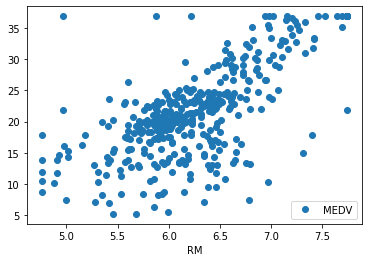

In [ ]:
dft.plot(x='RM', y='MEDV', style='o')
dft[['RM','MEDV']].corr()

**AGE - proportion of owner-occupied units built prior to 1940**

In [ ]:
#AGE
q1 = dft.AGE.quantile(0.25)
q3 = dft.AGE.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.AGE.max())
print ("min",dft.AGE.min())


upper 171.0
lower -34.80000000000001
max 100.0
min 2.9


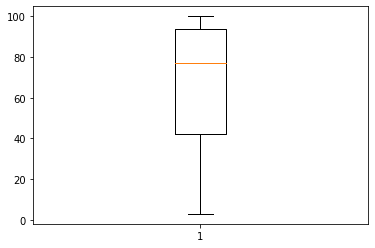

In [ ]:
plt.boxplot(dft.AGE)
plt.show()

,AGE,MEDV
AGE,1.000000,-0.434162
MEDV,-0.434162,1.000000


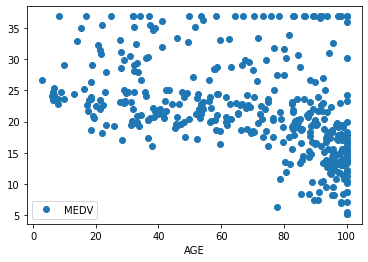

In [ ]:
dft.plot(x='AGE', y='MEDV', style='o')
dft[['AGE','MEDV']].corr()

**DIS - weighted distances to five Boston employment centres**

In [ ]:
#DIS
q1 = dft.DIS.quantile(0.25)
q3 = dft.DIS.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.DIS.max())
print ("min",dft.DIS.min())

upper 9.872775
lower -2.549025
max 12.1265
min 1.1296


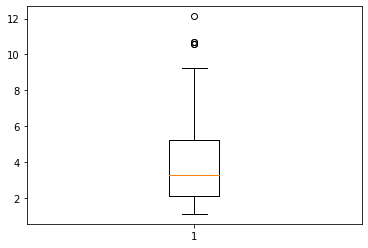

In [ ]:
plt.boxplot(dft.DIS)
plt.show()

In [ ]:
dft.DIS = dft.DIS.clip(lower_threshold,upper_threshold)

,RM,MEDV
RM,1.000000,0.714046
MEDV,0.714046,1.000000


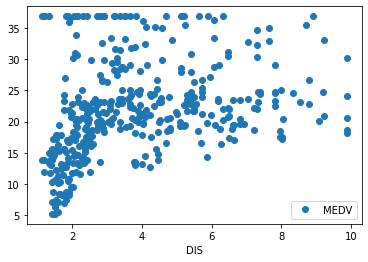

In [ ]:
dft.plot(x='DIS', y='MEDV', style='o')
dft[['RM','MEDV']].corr()

RAD - index of accessibility to radial highways

In [ ]:
q1 = dft.RAD.quantile(0.25)
q3 = dft.RAD.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.RAD.max())
print ("min",dft.RAD.min())

upper 54.0
lower -26.0
max 24
min 1


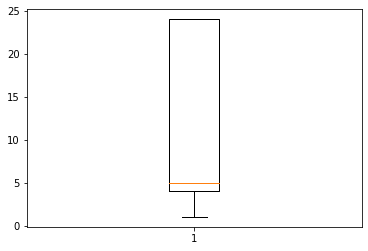

In [ ]:
plt.boxplot(dft.RAD)
plt.show()

,RAD,MEDV
RAD,1.000000,-0.463328
MEDV,-0.463328,1.000000


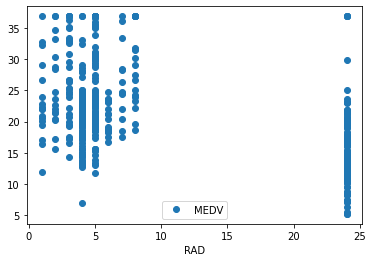

In [ ]:
dft.plot(x='RAD', y='MEDV', style='o')
dft[['RAD','MEDV']].corr()

**TAX - full-value property-tax rate per $10,000**

In [ ]:
q1 = dft.TAX.quantile(0.25)
q3 = dft.TAX.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.TAX.max())
print ("min",dft.TAX.min())

upper 1249.5
lower -306.5
max 711.0
min 187.0


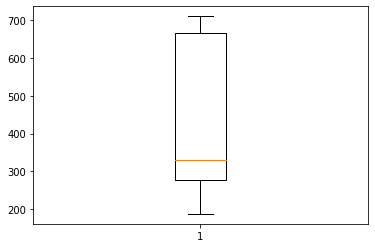

In [ ]:
plt.boxplot(dft.TAX)
plt.show()

,TAX,MEDV
TAX,1.000000,-0.557146
MEDV,-0.557146,1.000000


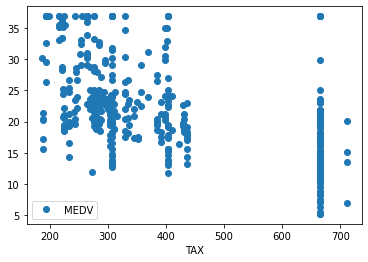

In [ ]:
dft.plot(x='TAX', y='MEDV', style='o')
dft[['TAX','MEDV']].corr()

**PTRATIO - pupil-teacher ratio by town**

In [ ]:
q1 = dft.PTRATIO.quantile(0.25)
q3 = dft.PTRATIO.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.PTRATIO.max())
print ("min",dft.PTRATIO.min())

upper 24.4
lower 13.199999999999998
max 22.0
min 12.6


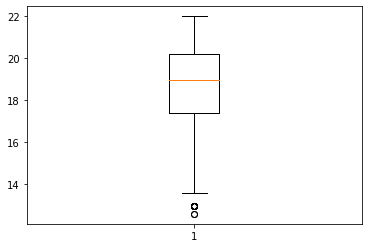

In [ ]:
plt.boxplot(dft.PTRATIO)
plt.show()

In [ ]:
dft.PTRATIO= dft.PTRATIO.clip(lower_threshold,upper_threshold)

,PTRATIO,MEDV
PTRATIO,1.000000,-0.514684
MEDV,-0.514684,1.000000


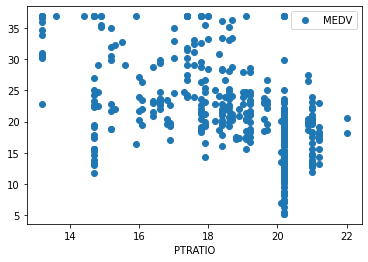

In [ ]:
dft.plot(x='PTRATIO', y='MEDV', style='o')
dft[['PTRATIO','MEDV']].corr()

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [ ]:
q1 = dft.B.quantile(0.25)
q3 = dft.B.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.B.max())
print ("min",dft.B.min())

upper 426.5399999999999
lower 345.86000000000007
max 396.9
min 0.32


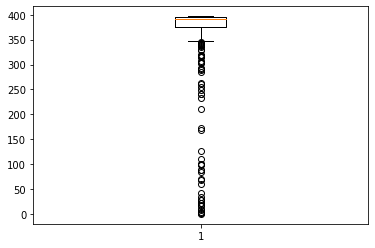

In [ ]:
plt.boxplot(dft.B)
plt.show()

In [ ]:
dft.B= dft.B.clip(lower_threshold,upper_threshold)

,B,MEDV
B,1.000000,0.311167
MEDV,0.311167,1.000000


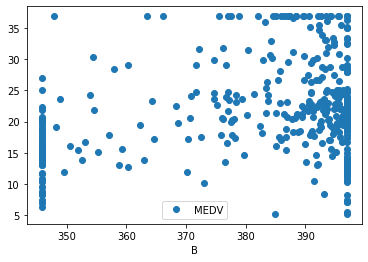

In [ ]:
dft.plot(x='B', y='MEDV', style='o')
dft[['B','MEDV']].corr()

**LSTAT - % lower status of the population**

In [ ]:
q1 = dft.LSTAT.quantile(0.25)
q3 = dft.LSTAT.quantile(0.75)
iqr = q3-q1
upper_threshold = (1.5*iqr)+q3
lower_threshold = q1-(1.5*iqr)
print("upper",upper_threshold)
print("lower",lower_threshold)
print ("max",dft.LSTAT.max())
print ("min",dft.LSTAT.min())

upper 31.79
lower -7.889999999999999
max 37.97
min 1.92


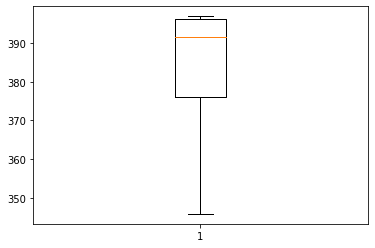

In [ ]:
plt.boxplot(dft.B)
plt.show()

,B,MEDV
B,1.000000,0.311167
MEDV,0.311167,1.000000


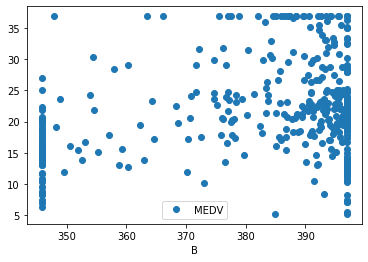

In [ ]:
dft.plot(x='B', y='MEDV', style='o')
dft[['B','MEDV']].corr()

**DROP DUPLICATES**

In [ ]:
dft = dft.drop_duplicates()
dft.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

getting data ready

In [ ]:
X = dft[['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']].values

In [ ]:
y = dft[["MEDV"]].values

**splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**fitting the model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[ -486.14014289],
       [ -559.86931308],
       [-1118.53965683],
       [ -732.77977358],
       [-1133.3614021 ],
       [-1130.35250104],
       [-1112.75997826],
       [ -563.60666956],
       [ -577.39138999],
       [ -509.86524599],
       [ -691.42548347],
       [ -511.62437183],
       [ -437.70012018],
       [-1132.67397418],
       [ -489.36563104],
       [-1143.97179131],
       [ -302.15167216],
       [ -514.1455731 ],
       [ -687.70547723],
       [-1149.43254106],
       [ -411.12815278],
       [ -563.83565149],
       [-1160.19639039],
       [ -360.73725581],
       [-1108.12689557],
       [ -456.34001463],
       [ -722.91660641],
       [-1268.77347368],
       [ -506.82786767],
       [-1127.09585614],
       [ -521.56783727],
       [ -472.7606752 ],
       [ -643.77708203],
       [ -732.88354266],
       [ -656.77860406],
       [ -673.56231532],
       [ -340.03823217],
       [ -400.45895306],
       [ -574.14869081],
       [ -498.87656796],


In [ ]:
# dic = {'Actual': y_test, 'Predicted': y_pred}
# df = pd.DataFrame(dic)
# df


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2- SCORE: -10986.643492767189


-10986.643492767189

ridge 

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

0.756744567414166

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['test_score'].mean())

Alpha :  0.001 0.7631029572523519 0.7631029572523519
Alpha :  0.002 0.7632432669328371 0.7632432669328371
Alpha :  0.003 0.7633672394571089 0.7633672394571089
Alpha :  0.005 0.7635720966395294 0.7635720966395294
Alpha :  0.01 0.7638868121823984 0.7638868121823984
Alpha :  0.02 0.7639837715977026 0.7639837715977026
Alpha :  0.03 0.7637003817364378 0.7637003817364378
Alpha :  0.04 0.7632221158830054 0.7632221158830054
Alpha :  0.1 0.7589742592557699 0.7589742592557699
Alpha :  0.2 0.7504163855340634 0.7504163855340634
Alpha :  0.5 0.7220930547595568 0.7220930547595568
Alpha :  1 0.6764288440880477 0.6764288440880477


lasso

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Lasso(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.7638131197884805 0.7924086550041469
Alpha :  0.002 0.7637306960576151 0.7913436655517411
Alpha :  0.003 0.7625750326914769 0.7895855003580622
Alpha :  0.005 0.7577041245847601 0.7840126877703077
Alpha :  0.01 0.7507467998661465 0.7728999367216469
Alpha :  0.02 0.7327905600462093 0.7533198451316829
Alpha :  0.03 0.7221628592083358 0.7407792885255633
Alpha :  0.04 0.7145879924547499 0.7312347951061288
Alpha :  0.1 0.6294325843850531 0.6470415136162277
Alpha :  0.2 0.3925761680706768 0.41227653015602134
Alpha :  0.5 -0.02472103503154708 0.0
Alpha :  1 -0.02472103503154708 0.0


knn regression